# **Projeto Final Python EBAC - Análise de dados de Adimplência e Inadimplência**



### **1.   Introdução ao projeto:**




> Neste projeto vamos analisar, a partir da base de dados concedida abaixo, para análise de comportamento de um grupo de clientes. Basicamente, vamos entender por qual motivo o cliente deixa de honrar com vossos compromissos, tudo isso baseado em comportamento e atributos, tais como: salário, nivel de escolaridade e movimentação financeira. Ao final do projeto, iremos visualizar a partir de gráficos comparativos, quais os aspectos gerais que se deve prestar atenção nos grupos de clientes.Bloco com recuo

> Para melhor entendimento do leitor, vamos utilizar a segunda coluna default, ela diferencia um cliente de adimplente ou inadimplente, conforme exemplo: ***Adimplente = 0 / Inadimplente = 1***. Abaixo, a descrição completa das colunas:









| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



### **2.   Códigos de importação das bibliotecas:**



In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

### **3.   Código da base geradora dos dados:**



In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

### **4. Etapa de exploração dos dados:**




1.   **Estrutura:**








In [63]:
df.shape

(10127, 16)

In [64]:
df[df['default'] == 0].shape

(8500, 16)

In [65]:
df[df['default'] == 1].shape

(1627, 16)

In [66]:
qtd_total, _=df.shape
qtd_adimplentes,_=df[df['default'] == 0].shape
qtd_inadimplentes,_=df[df['default'] == 1].shape

In [67]:
print(f'A proporção clienter adimplentes é de {round(100*qtd_adimplentes/qtd_total,2)}%')
print(f'A proporção clienter inadimplentes é de {round(100*qtd_inadimplentes/qtd_total,2)}%')

A proporção clienter adimplentes é de 83.93%
A proporção clienter inadimplentes é de 16.07%


2.   **Schema:**








In [68]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


 * Colunas e respectivos dados:




In [69]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

* Atributos categóricos:

In [70]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


* Atributos numéricos:

In [71]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


* Verificação de dados faltantes:

In [72]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


* Verificação de quais colunas possuem dados faltantes:

In [73]:
df.isna().any() #Colunas com resultado True possuem dados faltantes

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

* A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [74]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [75]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [76]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [77]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


> *Atenção!:* *A partir dos dados acima, verificamos que se excluirmos os dados de clientes que estão incompletos, não vamos sofrer modificações em nossa análise. Portanto, em virtude de trazer melhor análise, os mesmos serão retirados da base. Conforme o nosso proximo tópico, iremos efetuar a limpeza e transformação desses dados.*



### **5. Limpeza e transformação dos dados:**



> *Neste tópico, entendemos que precisamos efetuar a correção do Schema das nossas colunas e a remoção dos dados faltantes.*



* Correção de Schema: na exploração, se nota que as colunas de limite_de_credito e valor_transacao_12m estão sendo interpretadas como colunas categóricas erroneamente.

In [78]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [79]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


* Agora, vamos criar uma funçaõ lambda para limpeza de dados, e testar a aplicação através do método funcional map:

In [80]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


* Função lambda está OK, vamos aplicar as colunas de interesse:

In [81]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

* **Reescrevendo o Schema:**

In [82]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

* Atributos categóricos:

In [83]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


* Atributos numéricos:

In [84]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


* **Remoção de dados faltantes:**

In [85]:
df.dropna(inplace=True)

* Analisando as estruturas novamente:

In [86]:
df.shape

(7081, 16)

In [87]:
df[df['default'] == 0].shape

(5968, 16)

In [88]:
df[df['default'] == 1].shape

(1113, 16)

In [89]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [90]:
print(f"A proporcão adimplentes ativos antes da remoção era de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes antes da remoção era de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos antes da remoção era de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes antes da remoção era de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


> *Atenção!: Como podemos concluir, a remoção das linhas não afetou drasticamente as porcentagens, portanto, o estudo não será afetado em geral.*



### **6. Análise e visualização de gráficos:**



> Os dados estão prontos, portanto, vamos gerar as visualizações para compreender qual fator leva um cliente a inadimplencia.



In [91]:
df_adimplente = df[df['default'] == 0]

In [92]:
df_inadimplente = df[df['default'] == 1]

* Visualizações Categóricas:

In [93]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


* Escolaridade:

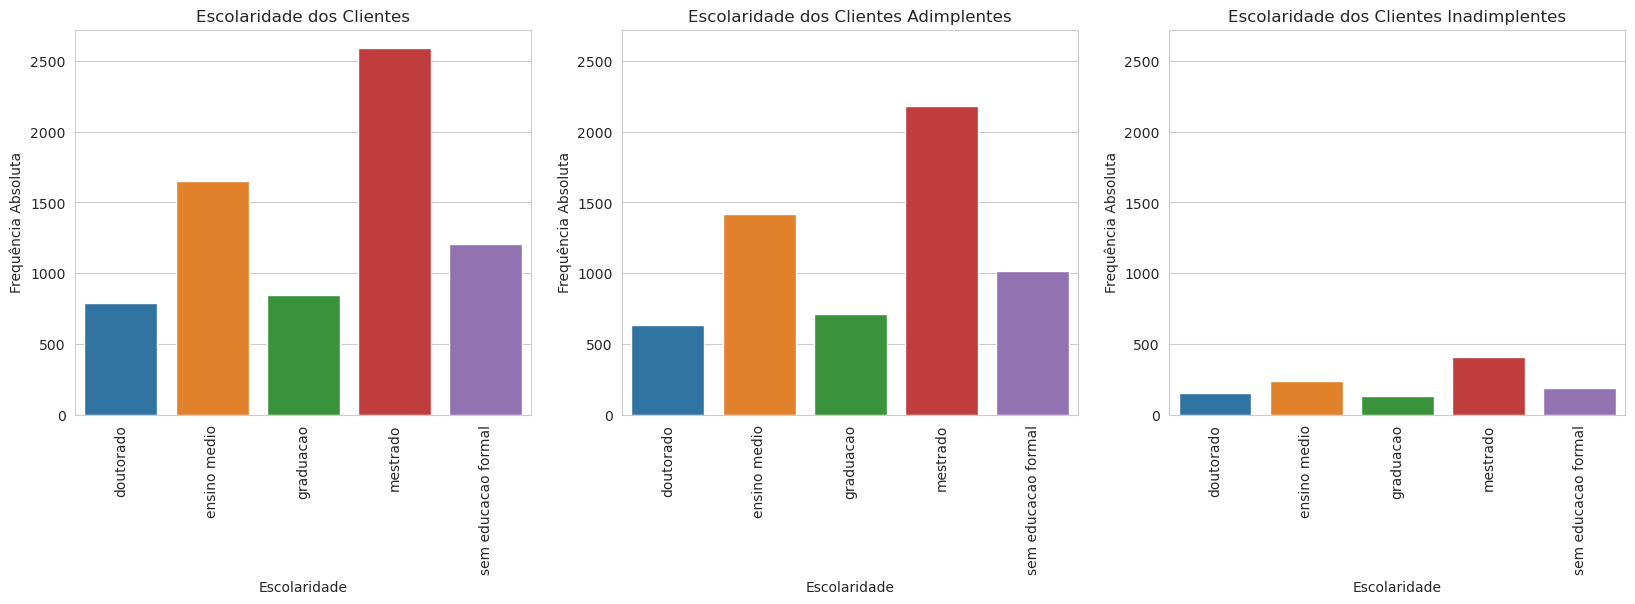

In [94]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Salário Anual:

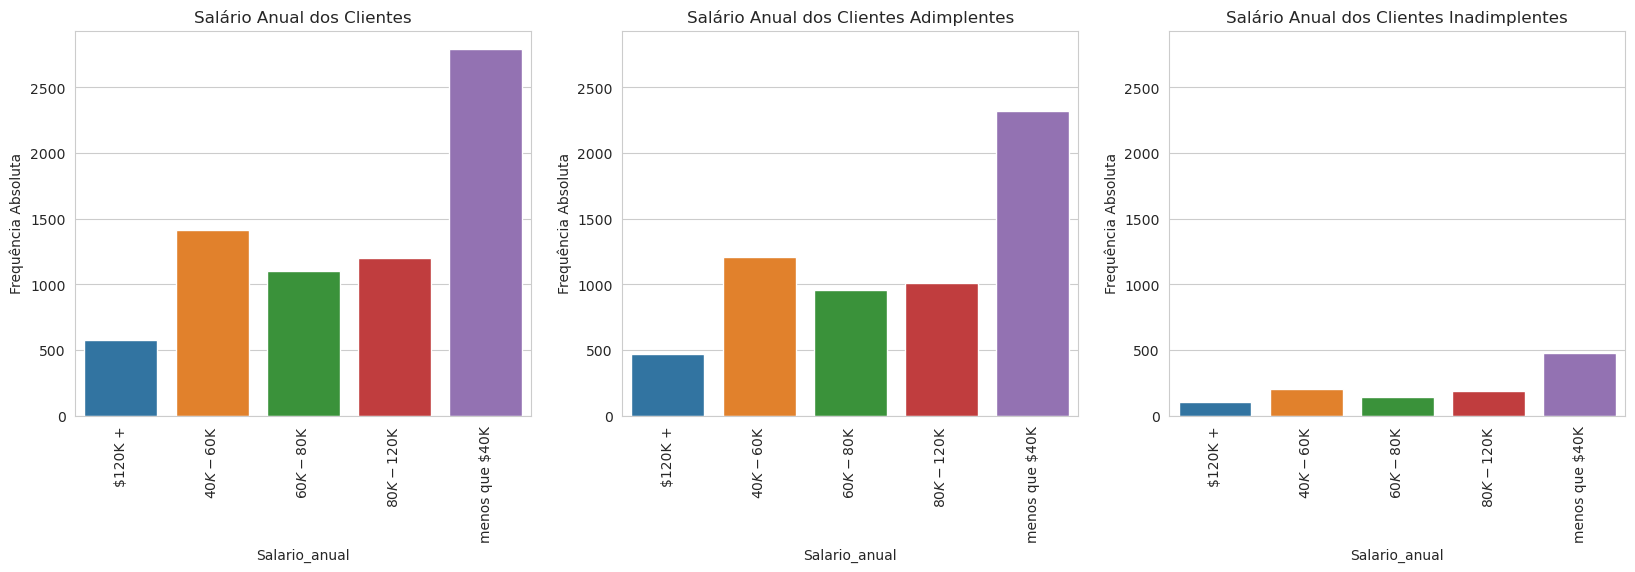

In [95]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Tipo de Cartão:

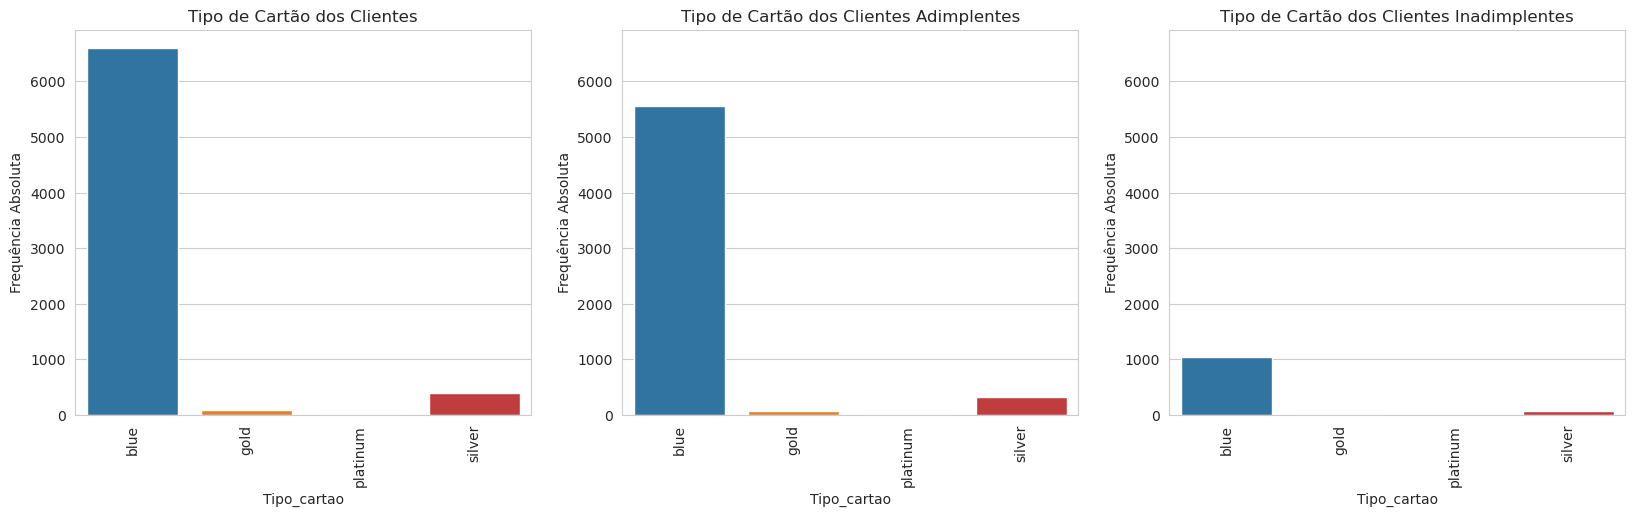

In [96]:
coluna = 'tipo_cartao'
titulos = ['Tipo de Cartão dos Clientes', 'Tipo de Cartão dos Clientes Adimplentes', 'Tipo de Cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Visualizações Numéricas:

In [97]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


* Idade:

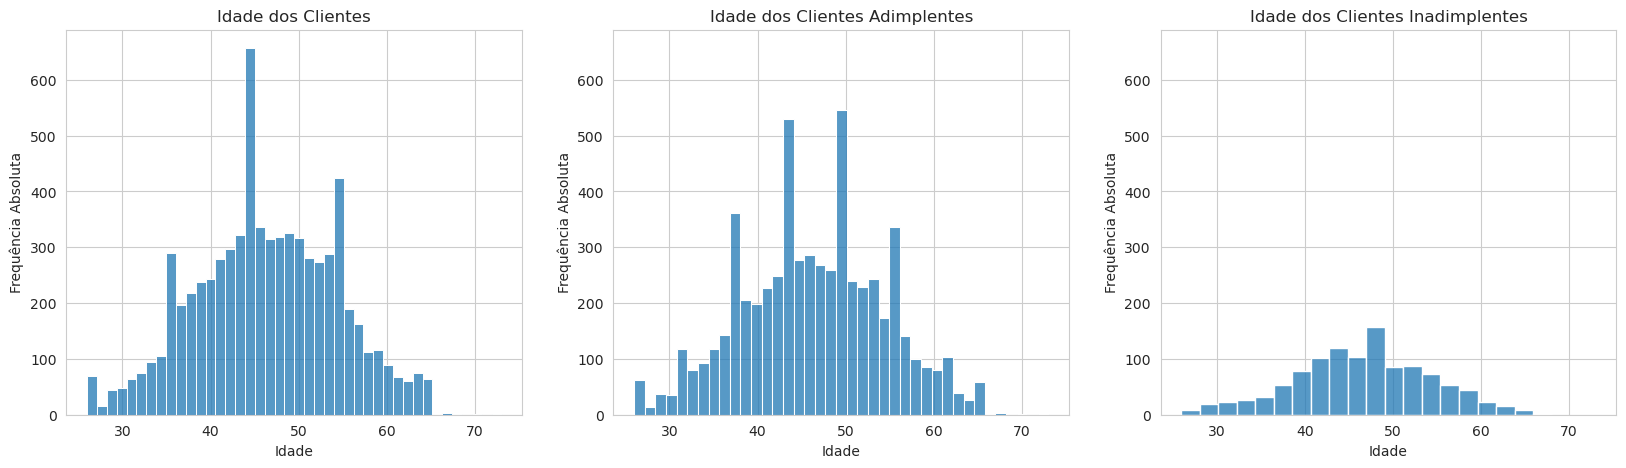

In [98]:
coluna = 'idade'
titulos = ['Idade dos Clientes', 'Idade dos Clientes Adimplentes', 'Idade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Meses de Relacionamento:

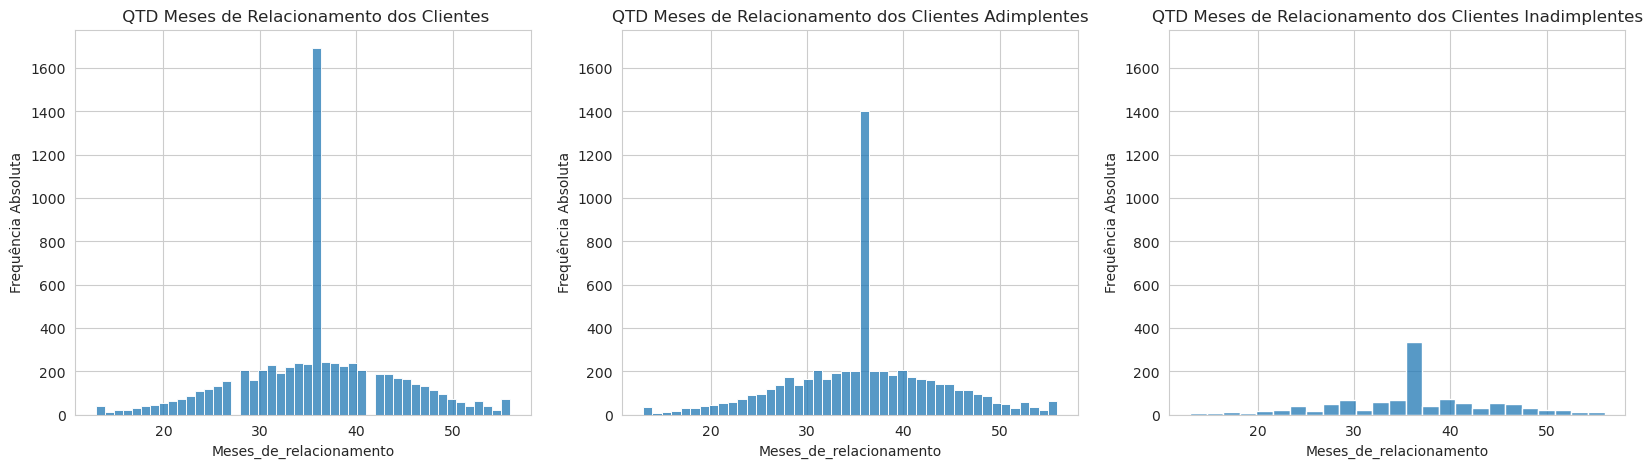

In [99]:
coluna = 'meses_de_relacionamento'
titulos = [' QTD Meses de Relacionamento dos Clientes', 'QTD Meses de Relacionamento dos Clientes Adimplentes', 'QTD Meses de Relacionamento dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Quantidade de interações por 12 meses:

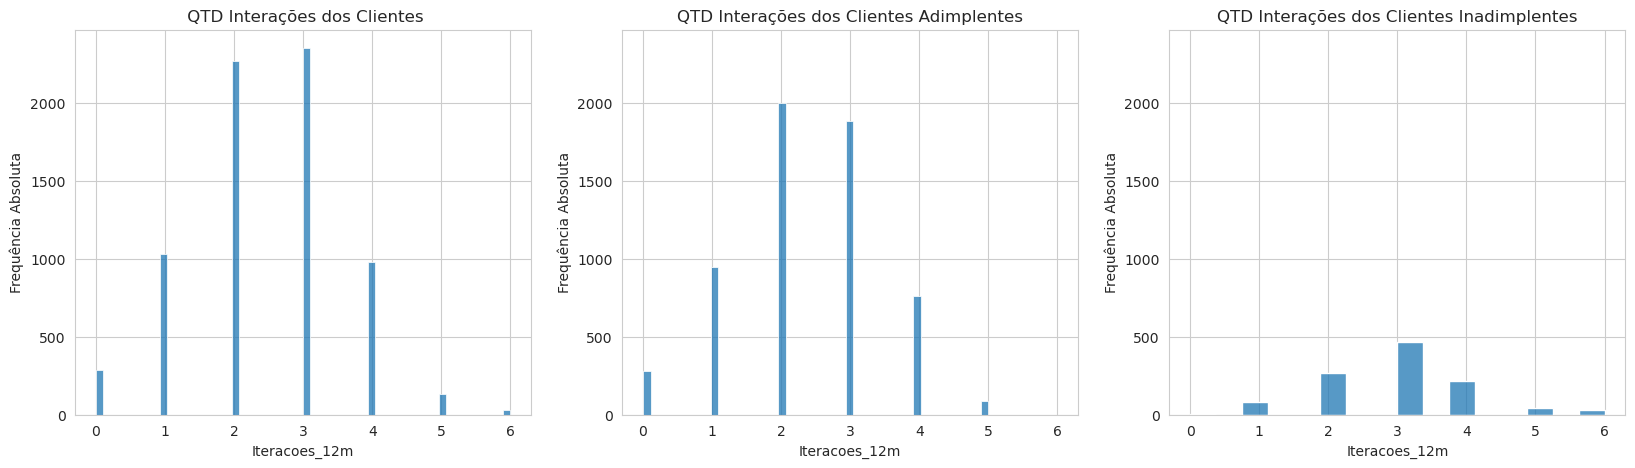

In [100]:
coluna = 'iteracoes_12m'
titulos = [' QTD Interações dos Clientes', 'QTD Interações dos Clientes Adimplentes', 'QTD Interações dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Limite de Crédito:

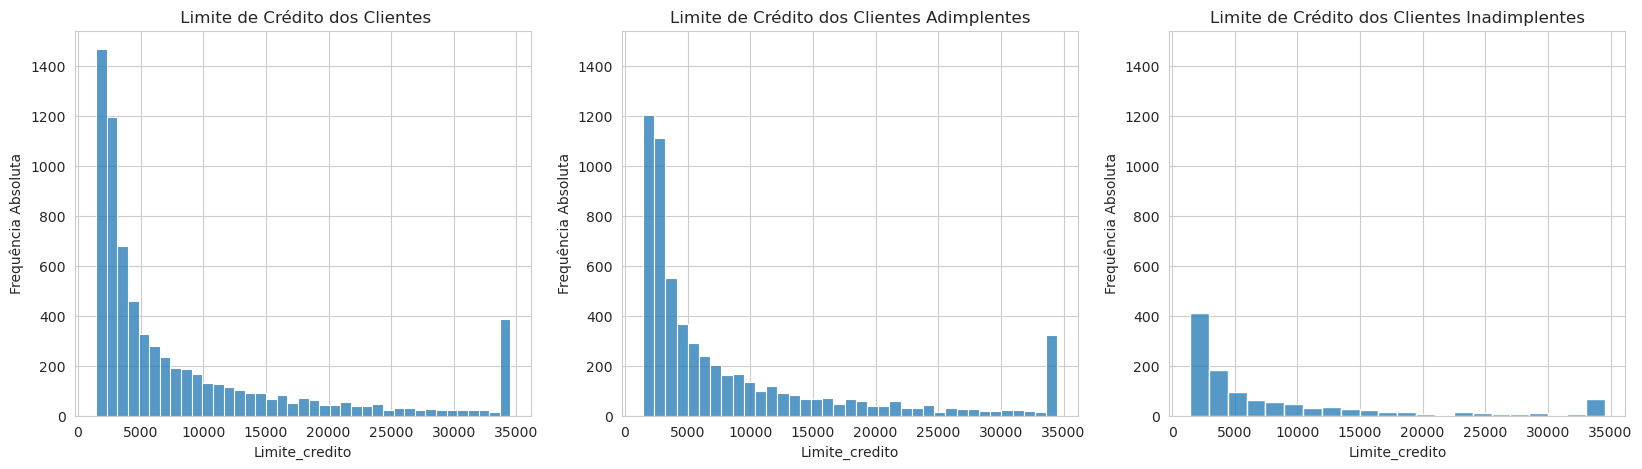

In [101]:
coluna = 'limite_credito'
titulos = [' Limite de Crédito dos Clientes', 'Limite de Crédito dos Clientes Adimplentes', 'Limite de Crédito dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Valor das transações durante 12 meses:

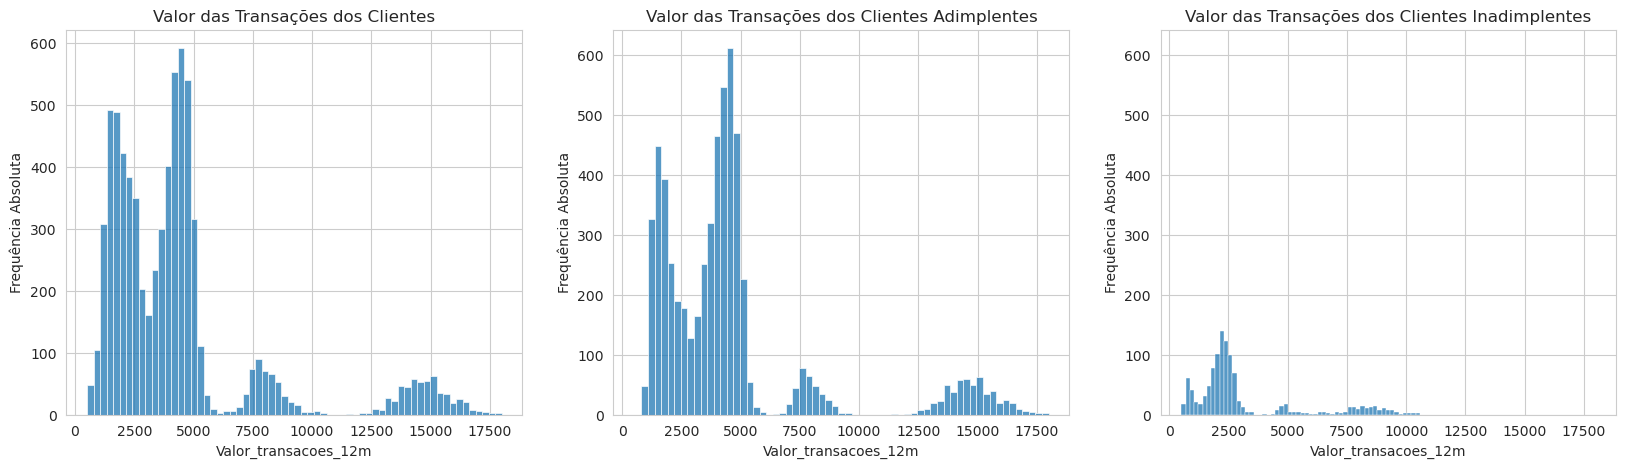

In [102]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações dos Clientes', 'Valor das Transações dos Clientes Adimplentes', 'Valor das Transações dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Quantidade de produtos contratados:

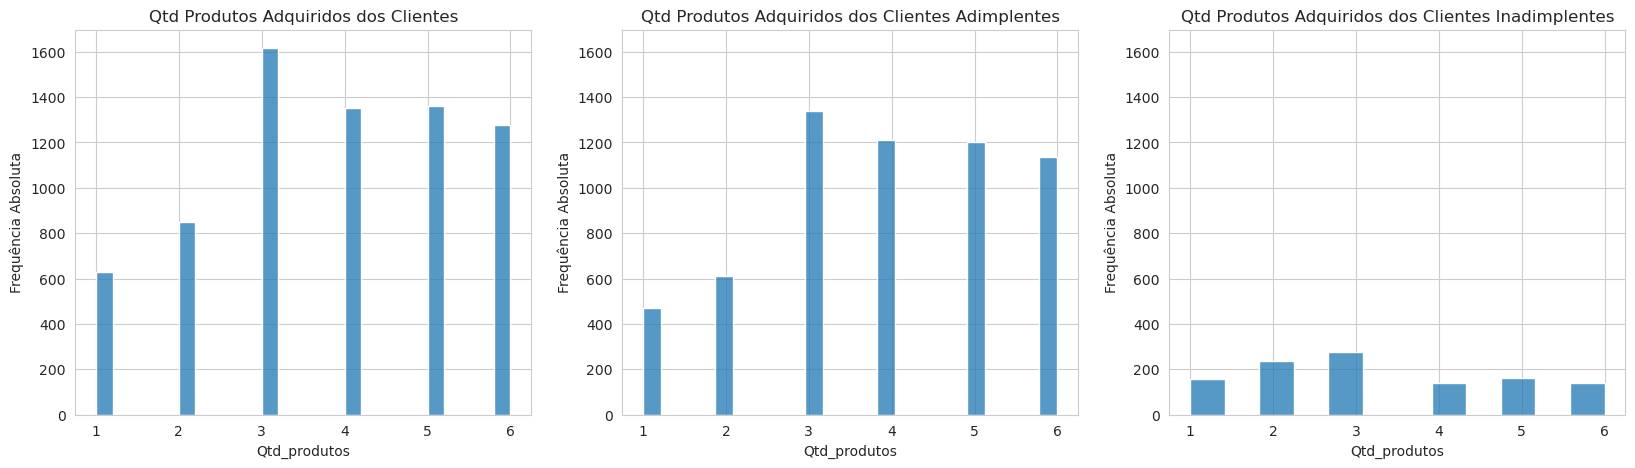

In [103]:
coluna = 'qtd_produtos'
titulos = ['Qtd Produtos Adquiridos dos Clientes', 'Qtd Produtos Adquiridos dos Clientes Adimplentes', 'Qtd Produtos Adquiridos dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

### **7. Conclusões de insights gerados:**



 Após a verificação dos dados a partir dos gráficos, podemos analisar alguns pontos preocupantes referente ao grupo dos cliente inadimplentes.  

 Precisamos ter atenção ao grupo de clientes que ganham menos de 40K BRL anual, e que estejam na faixa etária de 40 a 50 anos.

 São os clientes que compõe o maior numero de inadimplência, podemos verificar também que, esse grupo mais expressivo, não são compostos de clientes novos, e sim de correntistas que estão há mais de dois anos.

 Portanto, verificando isso, é interessante que para novos clientes com essas caracteristicas, deve ser estudado melhor a questão de contratação dos produtos.

 Também é visivel que, clientes com interação maior, a partir de 5 vezes, estão com niveis baixos de inadimplência, para a situação atual, é interessante o banco interagir mais com esses clientes, e ofertando opções para regularização dos pagamentos de produtos contratados.

 O ultimo ponto importante são que, os clientes inadimplentes costumam se agrupar no grupo com transações de no máximo 2500K BRL, portanto, é necessário ter muito cuidado ao ofertar serviços, pois ao longo dos meses os débitos podem se agrupar e tornar impossivel ao cliente de efetuar os devidos pagamentos.

 Esses dados, foram baseados apenas em dados numéricos e categóricos, excluindo quaisquer discriminações de sexo e estado civil, conforme a LGPD.

